## Import Libraries

In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import ast
from statistics import mean, median
import matplotlib.pyplot as plt

## Loading the Dataset

In [23]:
# Loading in and setting the data
user_data = pd.read_csv('SavedData/user_large.csv')
user_df = pd.DataFrame(user_data)

# Changing the lists back to normal columns
user_df['user_biz_interaction'] = user_df['user_biz_interaction'].apply(ast.literal_eval)
user_df['user_biz_interaction_frequency'] = user_df['user_biz_interaction_frequency'].apply(ast.literal_eval)
user_df['user_user_interaction'] = user_df['user_user_interaction'].apply(ast.literal_eval)
user_df['user_user_interaction_frequency'] = user_df['user_user_interaction_frequency'].apply(ast.literal_eval)
user_df['user_industry_interaction'] = user_df['user_industry_interaction'].apply(ast.literal_eval)
user_df['user_industry_interaction_frequency'] = user_df['user_industry_interaction_frequency'].apply(ast.literal_eval)

In [24]:
user_id_list = user_df['user_id']

In [25]:
user_df.head(50)

,user_id,total_tx_count,net_tx_count,total_tx_sum_gbp,net_tx_sum_gbp,sent_tx_count,sent_tx_sum_gbp,sent_tx_mean_gbp,sent_tx_median_gbp,received_tx_count,received_tx_sum_gbp,received_tx_mean_gbp,received_tx_median_gbp,user_biz_interaction,user_biz_interaction_frequency,user_user_interaction,user_user_interaction_frequency,user_industry_interaction,user_industry_interaction_frequency
0,1000,1903,1517,37720.11,19676.91,1710,28698.51,7.854277,4.50,193,9021.60,46.744041,5.5,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[116, 117, 2, 72, 5, 9, 19, 1, 35, 119, 1, 2, ...","[16354, 18013, 30208, 31489, 36647, 38289, 411...","[55, 14, 6, 12, 1, 14, 5, 14, 1, 18, 21, 1, 27...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[2, 1, 1, 813, 2, 3, 37, 1, 7, 2, 30, 21, 353,..."
1,10000,1114,720,21360.39,18944.39,917,20152.39,21.372710,11.00,197,1208.00,6.131980,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[6, 1, 16, 71, 59, 3, 9, 7, 33, 2, 22, 7, 9, 2...","[15896, 28620, 33124, 33732, 34123, 5277, 5439...","[39, 49, 1, 19, 10, 9, 59, 17, 29, 22, 19, 13]","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[1, 23, 34, 23, 1, 51, 2, 1, 14, 312, 119, 3, ..."
2,100000,1919,1433,23455.27,20720.37,1676,22087.82,11.567202,4.50,243,1367.45,5.627366,6.0,"[ACCESSORY_SHOP, A_CAFE, A_LOCAL_COFFEE_SHOP, ...","[5, 106, 129, 16, 95, 5, 11, 1, 122, 20, 1, 5,...","[12753, 24398, 24951, 28719, 34678, 39736, 489...","[19, 14, 24, 54, 17, 21, 6, 19, 9, 30, 27, 30,...","[Accessories, Alcohol, Apparel, Cafes, Coffee ...","[15, 6, 1, 828, 10, 58, 5, 2, 18, 1, 334, 65, ..."
3,100002,1561,1233,22393.96,20303.16,1397,21348.56,13.390346,4.50,164,1045.40,6.374390,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 59, 18, 155, 1, 48, 1, 4, 26, 9, 14, 58, ...","[10432, 14001, 3296, 37438, 37918, 46953, 5047...","[8, 1, 5, 1, 6, 10, 11, 7, 27, 2, 2, 1, 17, 4,...","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[7, 32, 2, 281, 2, 3, 33, 4, 2, 10, 269, 511, ..."
4,100019,1157,719,44632.75,16232.85,938,30432.80,20.213062,9.00,219,14199.95,64.839954,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[50, 54, 15, 91, 1, 1, 2, 11, 1, 9, 7, 68, 9, ...","[22634, 38580, 40565, 44911, 61350, 62299, 626...","[21, 33, 18, 4, 24, 11, 28, 25, 27, 58]","[Alcohol, Apparel, Books, Cafes, Children, Cof...","[1, 25, 1, 214, 4, 1, 38, 1, 12, 13, 314, 1, 6..."
5,100021,140,-140,874.85,-874.85,0,0.00,0.000000,0.00,140,874.85,6.248929,0.0,[],[],[],[],[],[]
6,100023,166,-166,10566.50,-10566.50,0,0.00,0.000000,0.00,166,10566.50,63.653614,0.0,[],[],[],[],[],[]
7,100027,109,-109,740.27,-740.27,0,0.00,0.000000,0.00,109,740.27,6.791468,0.0,[],[],[],[],[],[]
8,10004,1862,1636,18868.67,17654.27,1749,18261.47,9.030036,4.50,113,607.20,5.373451,5.5,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[118, 114, 5, 76, 15, 1, 6, 8, 19, 1, 32, 135,...","[1079, 14243, 1757, 26534, 33117, 35257, 36109...","[3, 10, 12, 13, 2, 61, 8, 7, 8, 32, 7, 3, 36, ...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[2, 3, 46, 869, 7, 35, 9, 2, 3, 26, 338, 2, 1,..."
9,100053,1652,1134,40478.88,19796.54,1393,30137.71,12.195368,6.00,259,10341.17,39.927297,6.0,"[A_CAFE, A_LOCAL_COFFEE_SHOP, A_SUPERMARKET, B...","[59, 37, 11, 65, 2, 44, 7, 22, 37, 48, 1, 1, 2...","[100274, 12782, 1476, 15938, 25098, 35916, 421...","[9, 11, 4, 15, 9, 44, 22, 15, 12, 10, 18, 21, ...","[Alcohol, Apparel, Books, Cafes, Coffee Beans ...","[1, 3, 1, 255, 7, 35, 6, 1, 262, 1, 357, 5, 46..."


Industry And Participants:

Command used to do this: grep -wo '\bBAR\b' fake_transactional_data_24.csv | wc -l

These numbers were found by using "find_all" and setting "Find entire cells only" to true in excel.

Cafes
- A_CAFE: 475154
- A_LOCAL_COFFEE_SHOP: 474159
- CAFÉ: 1, (Yes! there is one instance of this spelling)
- CAFE: 111139
    (Yes! there are two different spellings of cafe)
- COFFEE_SHOP: 476099,
- GOURMET_COFFEE_SHOP: 232462,
- TOTALLY_A_REAL_COFFEE_SHOP: 476064,
- PRETENTIOUS_COFFEE_SHOP: 232872,
- HIPSTER_COFFEE_SHOP: 232588
- Cafe Industry Total: 2710537
- Cafe Industry Avg. (Assuming 5000 users): 542.1074

Pubs / Bars
- WINE_BAR: 121995
- WHISKEY_BAR: 122900
- PUB: 834380
- G&T_BAR: 123219
- COCKTAIL_BAR: 123076
- LOCAL_WATERING_HOLE: 649043
- BAR: 770414
- Pubs / Bars Industry Total: 2745027
- Pubs / Bars Industry Avg. (Assuming 5000 users): 549.01

### Alcoholics Index

In [49]:
alcohol_interaction_frequency = []
sector = 'Cafes'

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if sector in user_df['user_industry_interaction'][user_df_index]:
        alcohol_index = user_df['user_industry_interaction'][user_df_index].index(sector)
        alcohol_count = user_df['user_industry_interaction_frequency'][user_df_index][alcohol_index]
    else:
        alcohol_count = 0
        
    alcohol_interaction_frequency.append(alcohol_count)
    
alcohol_interaction_zip = zip(user_id_list, alcohol_interaction_frequency)
sorted_alcohol_interaction_zip = sorted(alcohol_interaction_zip, key=lambda x: x[1])

alc_user_id, sorted_alcohol_interaction_frequency = zip(*sorted_alcohol_interaction_zip)

alc_user_id_list = list(alc_user_id)
sorted_alcohol_interaction_frequency_list = list(sorted_alcohol_interaction_frequency)

print(len(alc_user_id_list))
print(sorted_alcohol_interaction_frequency_list)

alcohol_consumption_average = mean(sorted_alcohol_interaction_frequency_list)
print(sum(sorted_alcohol_interaction_frequency_list))



14236
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

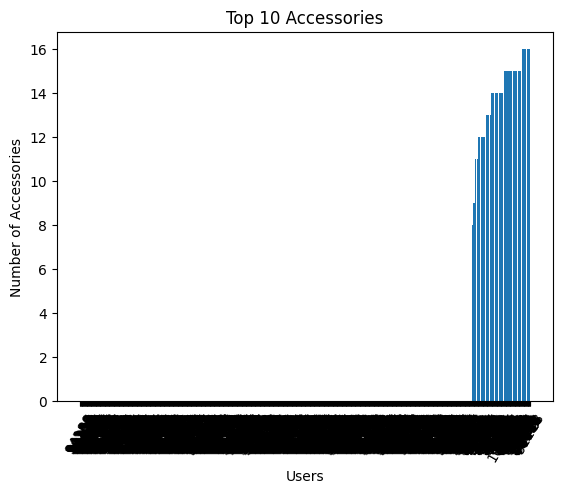

In [49]:
# Convert list to bar chart lists
x_alc_bar = [str(item) for item in alc_user_id_list[13000:14000]]
x_alc_bar.append("Avg.")
y_alc_bar = sorted_alcohol_interaction_frequency_list[13000:14000]
y_alc_bar.append(alcohol_consumption_average)

# Creating Alcoholics Bar Chart
plt.bar(x_alc_bar, y_alc_bar)

# Adding labels and title for clarity
plt.xlabel('Users')
plt.ylabel('Number of ' + str(sector))
plt.xticks(rotation=60)
plt.title('Top 10 ' + str(sector))

# Show the plot
plt.show()

## Bad with Money Index

### Dining Index

In [12]:
dining_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if 'Dining' in user_df['user_industry_interaction'][user_df_index]:
        dining_index = user_df['user_industry_interaction'][user_df_index].index('Dining')
        dining_count = user_df['user_industry_interaction_frequency'][user_df_index][dining_index]
    else:
        dining_count = 0
        
    dining_interaction_frequency.append(dining_count)

### Apparel Index

In [13]:
apparel_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if 'Apparel' in user_df['user_industry_interaction'][user_df_index]:
        apparel_index = user_df['user_industry_interaction'][user_df_index].index('Apparel')
        apparel_count = user_df['user_industry_interaction_frequency'][user_df_index][apparel_index]
    else:
        apparel_count = 0
        
    apparel_interaction_frequency.append(apparel_count)

### Pubs and Bars Index

In [14]:
pb_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if 'Pubs / Bars' in user_df['user_industry_interaction'][user_df_index]:
        pb_index = user_df['user_industry_interaction'][user_df_index].index('Pubs / Bars')
        pb_count = user_df['user_industry_interaction_frequency'][user_df_index][pb_index]
    else:
        pb_count = 0
        
    pb_interaction_frequency.append(pb_count)

### Lunch Index

In [15]:
lunch_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if "Lunch / Light Meal" in user_df['user_industry_interaction'][user_df_index]:
        lunch_index = user_df['user_industry_interaction'][user_df_index].index("Lunch / Light Meal")
        lunch_count = user_df['user_industry_interaction_frequency'][user_df_index][lunch_index]
    else:
        lunch_count = 0
        
    lunch_interaction_frequency.append(lunch_count)

### Cafe Shop Index

In [16]:
cafe_interaction_frequency = []

for user_df_index in range(0, len(user_df['user_industry_interaction'])):
    if "Cafes" in user_df['user_industry_interaction'][user_df_index]:
        cafe_index = user_df['user_industry_interaction'][user_df_index].index("Cafes")
        cafe_count = user_df['user_industry_interaction_frequency'][user_df_index][cafe_index]
    else:
        cafe_count = 0
        
    cafe_interaction_frequency.append(cafe_count)

### Adding up all the Frivilous Index

In [17]:
friv_list_zip = zip(friv_list, user_id_list, dining_interaction_frequency, apparel_interaction_frequency, pb_interaction_frequency, lunch_interaction_frequency, cafe_interaction_frequency)
sorted_friv_list_zip = sorted(friv_list_zip, key=lambda x: x[0])

# Ensure this line uses the correct variable name and that each tuple in the zipped list has exactly 6 elements
sorted_friv_interaction_frequency, friv_user_id, dining_interaction_sorted, apparel_interaction_sorted, pb_interaction_sorted, lunch_interaction_sorted, cafe_interaction_sorted = zip(*sorted_friv_list_zip)

sorted_friv_interaction_frequency_list = list(sorted_friv_interaction_frequency)
friv_user_id_list = list(friv_user_id)
apparel_interaction_sorted_list = list(apparel_interaction_sorted)
pb_interaction_sorted_list = list(pb_interaction_sorted)
lunch_interaction_sorted_list = list(lunch_interaction_sorted)
cafe_interaction_list = list(cafe_interaction_sorted)

NameError: name 'friv_list' is not defined

### Removing non lloyds customers

In [ ]:
n = pb_interaction_sorted.count(0)
sorted_friv_interaction_frequency_list = sorted_friv_interaction_frequency_list[n:]
friv_user_id_list = friv_user_id_list[n:]
apparel_interaction_sorted_list = apparel_interaction_sorted_list[n:]
pb_interaction_sorted_list = pb_interaction_sorted_list[n:]
lunch_interaction_sorted_list = lunch_interaction_sorted_list[n:]
cafe_interaction_sorted_list = cafe_interaction_list[n:]

### Finding Correlations between the different lists

In [ ]:
from scipy.stats import pearsonr

pb_cafe_corr = pearsonr(pb_interaction_sorted_list, cafe_interaction_sorted_list)
lunch_cafe_corr = pearsonr(lunch_interaction_sorted_list, cafe_interaction_sorted_list)
pb_lunch_corr = pearsonr(pb_interaction_sorted_list, lunch_interaction_sorted_list)

In [ ]:
print(pb_cafe_corr)
print(lunch_cafe_corr)
print(pb_lunch_corr)

### Creating Stacked Bar Chart

In [ ]:
Categories = [
    'Apparel',
    'Pubs',
    'Lunch',
    'Cafe'
]